         V1        V2
0 -0.489826 -0.679679
1 -0.518791  0.545006
2  0.330885  0.268976
3 -0.482374 -0.092110
4 -0.563289 -0.481916
         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945   28.493517           1.000000     291.12              0.00   
8946   19.183215           1.000000     300.00              0.00   
8947   23.398673           0.833333     144.40              0.00   
8948   13.457564           0.833333       0.00              0.00   
8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS

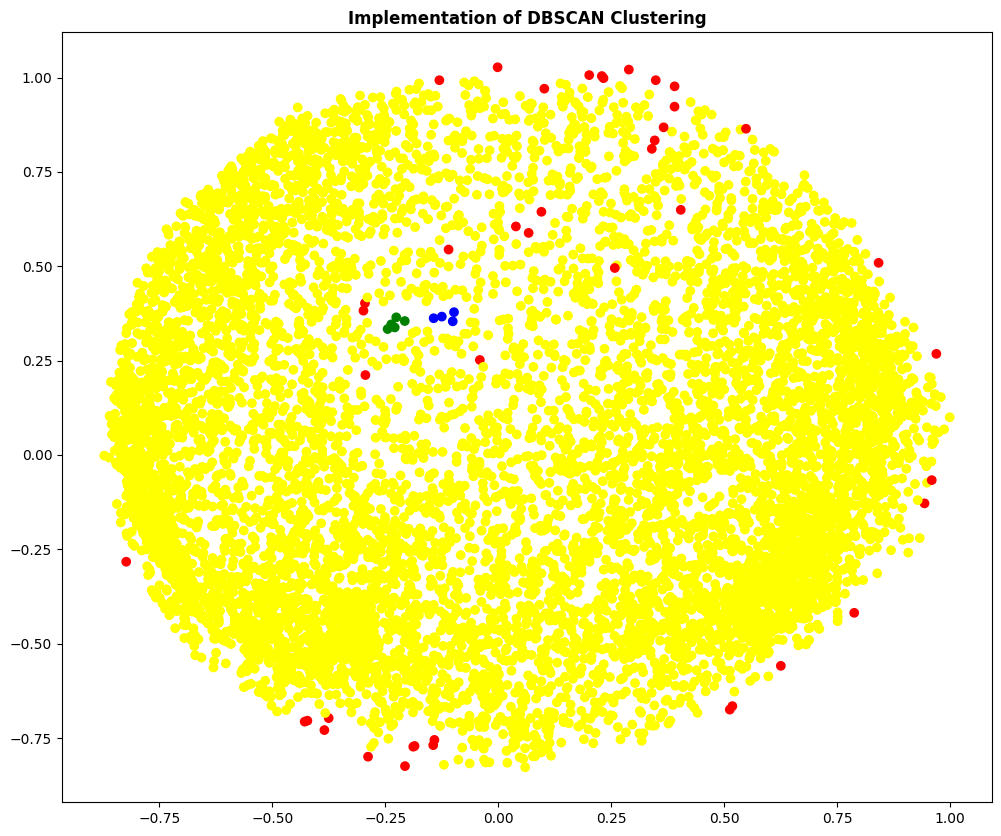

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data = pd.read_csv("/content/sample_data/ccgeneral.csv")
data.head()
data.isnull().sum()
data = data.drop('CUST_ID',axis = 1)
data.fillna(data.mean(),inplace = True)
scaler = StandardScaler()
x_scaled=scaler.fit_transform(data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1','V2']
print(x_principal.head())
dbscan = DBSCAN(eps=0.036,min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_
print(data.tail())
clusterColor = {0:u'yellow',1:u'green',2:'blue',-1:u'red'}
colors = [clusterColor[label]for label in labels]
plt.figure(figsize = (12,10))
plt.scatter(x_principal['V1'],x_principal['V2'],c = colors)
plt.title("Implementation of DBSCAN Clustering",fontname = "Times New Roman",fontweight = "bold")
plt.show()